**[OFE-01]** 필요한 모듈을 임포트한다.

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pickle

**[OFE-02]** 데이터 파일 'ORENIST.data'에서 이미지와 라벨 데이터를 읽어들인다.

In [43]:
with open('data\ORENIST.data', 'rb') as file:
    images, labels = pickle.load(file, encoding='latin1')

**[OFE-03]** 이미지 데이터 샘플을 출력한다.

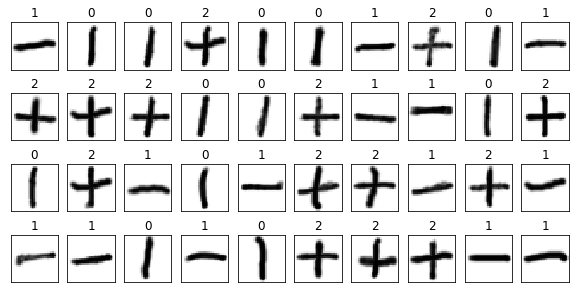

In [44]:
fig = plt.figure(figsize=(10,5))
for i in range(40):
    subplot = fig.add_subplot(4, 10, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(images[i].reshape(28,28), cmap=plt.cm.gray_r)

**[OFE-04]** 필터 정보를 저장한 다차원 리스트를 만드는 함수를 준비한다.

In [45]:
def edge_filter():
    filter0 = np.array(
            [[ 2, 1, 0,-1,-2],
             [ 3, 2, 0,-2,-3],
             [ 4, 3, 0,-3,-4],
             [ 3, 2, 0,-2,-3],
             [ 2, 1, 0,-1,-2]]) / 23.0
    filter1 = np.array(
            [[ 2, 3, 4, 3, 2],
             [ 1, 2, 3, 2, 1],
             [ 0, 0, 0, 0, 0],
             [-1,-2,-3,-2,-1],
             [-2,-3,-4,-3,-2]]) / 23.0
    
    filter_array = np.zeros([5,5,1,2])
    filter_array[:,:,0,0] = filter0
    filter_array[:,:,0,1] = filter1

    return tf.constant(filter_array, dtype=tf.float32)

**[OFE-05]** 이미지 데이터에 필터를 적용하는 계산식을 준비한다.

In [46]:
x = tf.placeholder(tf.float32, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv = edge_filter()
h_conv = tf.abs(tf.nn.conv2d(x_image, W_conv,
                             strides=[1,1,1,1], padding='SAME'))
h_conv_cutoff = tf.nn.relu(h_conv-0.2)

h_pool =tf.nn.max_pool(h_conv_cutoff, ksize=[1,2,2,1],
                       strides=[1,2,2,1], padding='SAME')

**[OFE-06]** 세션을 준비하고 Variable을 초기화한다.

In [47]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

**[OFE-07]** 최초 9개의 이미지 데이터에 대해 합성곱 필터를 적용한 결과를 계산한다.

In [48]:
filter_vals, conv_vals = sess.run([W_conv, h_conv_cutoff],
                                  feed_dict={x:images[:9]})

**[OFE-08]** 얻어진 결과를 이미지로 출력한다.

여기서는 원본 이미지와 두 종류의 필터를 적용한 결과를 각각 출력하고 있다.

왼쪽은 적용한 필터를 이미지화한 것이다.

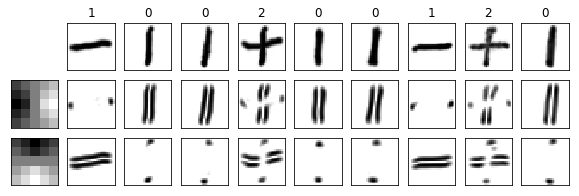

In [49]:
fig = plt.figure(figsize=(10,3))

for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i], cmap=plt.cm.gray_r)

v_max = np.max(conv_vals)

for i in range(9):
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(images[i].reshape((28,28)), 
                   cmap=plt.cm.gray_r)
    
    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,0], cmap=plt.cm.gray_r)
    
    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,1], cmap=plt.cm.gray_r)

**[OFE-09]** 필터 적용 후에 풀링 계층을 적용한 결과를 얻는다.

In [50]:
pool_vals = sess.run(h_pool, feed_dict={x:images[:9]})

**[OFE-10]** 얻어진 결과를 이미지로 출력한다.

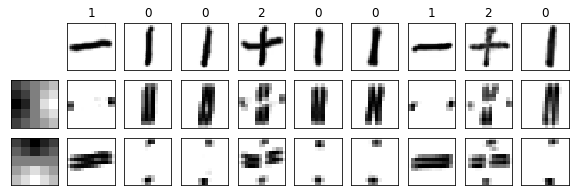

In [51]:
fig = plt.figure(figsize=(10,3))

for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i],
                   cmap=plt.cm.gray_r, interpolation='nearest')

v_max = np.max(pool_vals)

for i in range(9):
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(images[i].reshape((28,28)), 
                   cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(pool_vals[i,:,:,0],
                   cmap=plt.cm.gray_r)
    
    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(pool_vals[i,:,:,1],cmap=plt.cm.gray_r)